
## Część 1: SHAP

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import dalex as dx
from sklearn.neural_network import MLPClassifier
import shap
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

dx.__version__

data = dx.datasets.load_dragons()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
data = data.replace({'red': 1, 'green': 2, 'blue': 3, 'black': 4})

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


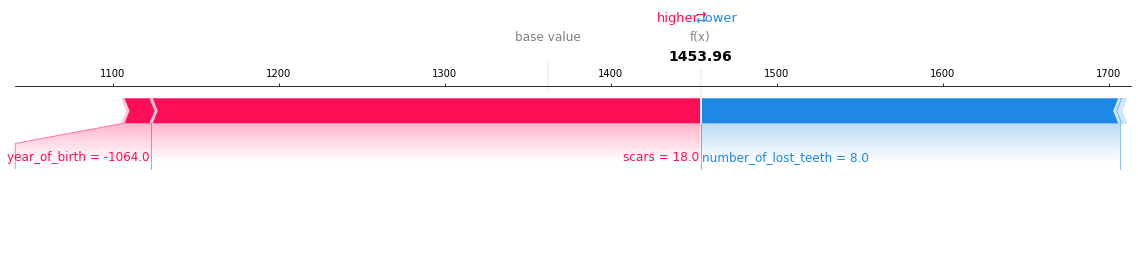

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        data.drop(['life_length'], axis=1), data['life_length'],
        test_size=0.2, random_state=42, shuffle=False)


model = RandomForestRegressor().fit(X_train,y_train)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)


row_to_show = 399
data_for_prediction = X_test.iloc[row_to_show]
explainer = shap.TreeExplainer(clf)

    # Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction, matplotlib= True)


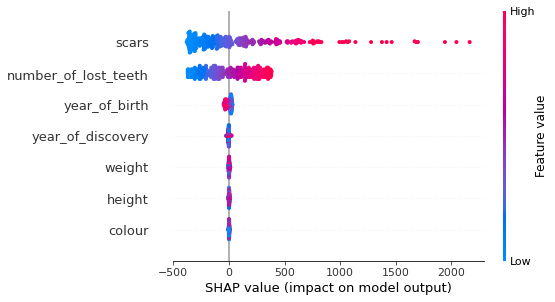

In [ ]:


model = RandomForestRegressor().fit(X_train, y_train)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

row_to_show = 399
data_for_prediction = X_test.iloc[row_to_show]
shap.initjs()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



X does not have valid feature names, but Lasso was fitted with feature names


  0%|          | 0/400 [00:00<?, ?it/s]

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parame

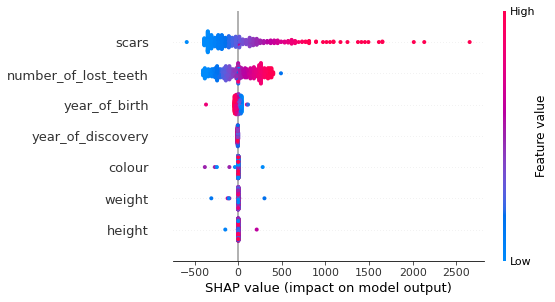

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso().fit(X_train, y_train)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

explainer = shap.KernelExplainer(model.predict,X_train)
data_k = shap.sample(X_test, 400)
shap_values = explainer.shap_values(X_test,nsamples=15)

shap.summary_plot(shap_values,X_test)

In [ ]:


from sklearn.linear_model import Lasso
model = Lasso().fit(X_train, y_train)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

explainer = shap.KernelExplainer(model.predict,X_train)
data_k = shap.sample(X_test, 400)
shap_values = explainer.shap_values(X_test,nsamples=100)

shap.summary_plot(shap_values,X_test)



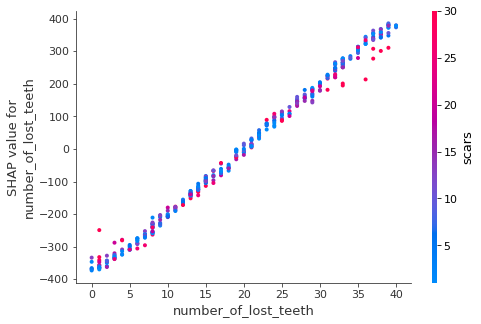

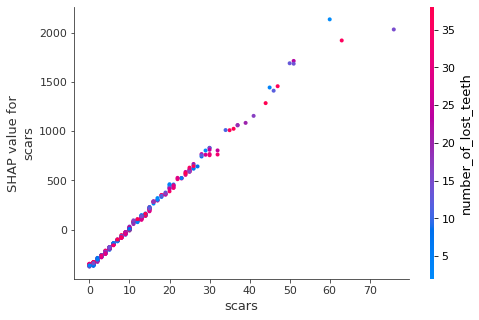

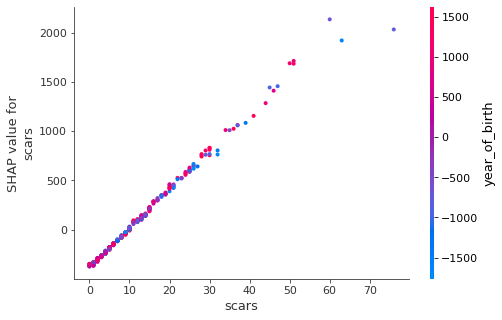

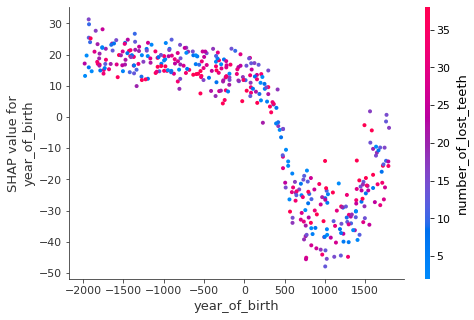

In [ ]:
import shap  # package used to calculate Shap values

model = RandomForestRegressor().fit(X_train, y_train)
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)

# make plot.
shap.dependence_plot('number_of_lost_teeth', shap_values, X_test, interaction_index="scars")

shap.dependence_plot('scars', shap_values, X_test, interaction_index="number_of_lost_teeth")

shap.dependence_plot('scars', shap_values, X_test, interaction_index="year_of_birth")

shap.dependence_plot('year_of_birth', shap_values, X_test, interaction_index="number_of_lost_teeth")


# Część 2: Dalex

In [ ]:
import dalex as dx

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

dx.__version__

data = dx.datasets.load_dragons()

X = data.drop(columns='life_length')
y = data.life_length
y = y.astype('float')
data.head(2000)

In [ ]:
#utworzenie sieci na podstawie kodu dostępnego na stronie https://dalex.drwhy.ai/python-dalex-titanic.html
numerical_features = ['scars', 'number_of_lost_teeth', 'height', 'weight', 'year_of_birth', 'year_of_discovery']
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
         ('scaler', StandardScaler())
    ]
)

categorical_features = ['colour']
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPRegressor())])

y = y.astype('int')
clf.fit(X, y)

exp = dx.Explainer(clf, X, y)

Preparation of a new explainer is initiated

  -> data              : 2207 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2207 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f05d4ed6b90> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000405, mean = 0.311, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.976, mean = 0.011, max = 0.984
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
smaug = pd.DataFrame({
                      'year_of_birth': [-1200],
                      'height': [60],
                      'weight': [15],
                      'scars': [8],
                      'colour': ['red'],
                      'year_of_discovery': [1700],
                      'number_of_lost_teeth': [22]},
                      index = ['Smaug'])

fafnir = pd.DataFrame({
                      'year_of_birth': [-8],
                      'height': [54],
                      'weight': [16],
                      'scars': [20],
                       'colour': ['black'],
                      'year_of_discovery': [1755],
                      'number_of_lost_teeth': [28]},
                      index = ['Fafnir'])


In [ ]:
exp.predict(smaug)

In [ ]:
exp.predict(fafnir)

array([0.71632418])

Możemy również wykonać predykcję dla wielu próbek jednocześnie:

In [ ]:
exp.predict(X)[0:50]

array([0.08712855, 0.36505163, 0.23287846, 0.49544159, 0.4560657 ,
       0.11555101, 0.16963261, 0.95557602, 0.14574043, 0.10434728,
       0.12727644, 0.12210301, 0.49487325, 0.58888466, 0.68529622,
       0.05752552, 0.11560851, 0.10293495, 0.11267857, 0.11538247,
       0.95650151, 0.10651653, 0.73971363, 0.96051102, 0.25023227,
       0.93249381, 0.10329983, 0.16528766, 0.28985201, 0.1618133 ,
       0.43081801, 0.04814835, 0.12589747, 0.13499139, 0.13899623,
       0.18023122, 0.12404694, 0.12270749, 0.00374468, 0.11840589,
       0.06578846, 0.10433517, 0.09861671, 0.0695322 , 0.98620676,
       0.07985242, 0.1184383 , 0.84726595, 0.05683683, 0.98668383])

In [ ]:
bd_smaug = exp.predict_parts(smaug, type='break_down', label='Smaug')
bd_interactions_smaug = exp.predict_parts(smaug, type='break_down_interactions', label="Smaug_2")

In [ ]:
bd_smaug.result

In [ ]:
bd_interactions_smaug.result

In [ ]:
bd_smaug.plot(bd_interactions_smaug)

In [ ]:
exp.predict_parts(smaug, type='shap', B = 5, label=smaug.index[0]).plot(max_vars=10)

In [ ]:
cp_smaug= exp.predict_profile(smaug, label=smaug.index[0])
cp_fafnir = exp.predict_profile(fafnir, label=fafnir.index[0])

Calculating ceteris paribus: 100%|██████████| 7/7 [00:00<00:00, 138.94it/s]


In [ ]:
cp_fafnir.result.head()

,year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,_original_,_yhat_,_vname_,_ids_,_label_
Fafnir,-1999.00,54.0,16.0,20.0,black,1705,28.0,-8,1658.055282,year_of_birth,Fafnir,Fafnir
Fafnir,-1961.01,54.0,16.0,20.0,black,1705,28.0,-8,1654.618612,year_of_birth,Fafnir,Fafnir
Fafnir,-1923.02,54.0,16.0,20.0,black,1705,28.0,-8,1651.181942,year_of_birth,Fafnir,Fafnir
Fafnir,-1885.03,54.0,16.0,20.0,black,1705,28.0,-8,1647.745272,year_of_birth,Fafnir,Fafnir
Fafnir,-1847.04,54.0,16.0,20.0,black,1705,28.0,-8,1644.308602,year_of_birth,Fafnir,Fafnir


In [ ]:
cp_fafnir.plot(cp_smaug)

In [ ]:
cp_fafnir.plot(cp_smaug, variable_type = "categorical")

In [ ]:
exp.model_performance(model_type='regression')

,mse,rmse,r2,mae,mad
MLPRegressor,107726.885149,328.21774,0.510275,303.295375,304.64067


In [ ]:
exp.model_performance(model_type='regression').plot(geom='roc')

In [ ]:
vi = exp.model_parts()
vi.result

,variable,dropout_loss,label
0,colour,327.446455,MLPRegressor
1,_full_model_,327.466134,MLPRegressor
2,year_of_discovery,327.830519,MLPRegressor
3,year_of_birth,330.188731,MLPRegressor
4,height,348.233548,MLPRegressor
5,weight,348.666301,MLPRegressor
6,number_of_lost_teeth,491.154727,MLPRegressor
7,scars,627.884622,MLPRegressor
8,_baseline_,730.468653,MLPRegressor


In [ ]:
exp.model_parts().plot()